In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets


In [3]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: therealsheero
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 207MB/s]


In [5]:
Train_df = '/content/brain-tumor-mri-dataset/Training'

filepaths = []
labels = []
folds = os.listdir(Train_df)
for fold in folds:
    FoldPath = os.path.join(Train_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 1321/1321 [00:00<00:00, 602443.80it/s]


In [7]:
print(len(filepaths))
print(len(labels))
print(labels[-1])
print(np.unique(labels))

5712
5712
glioma
['glioma' 'meningioma' 'notumor' 'pituitary']


In [8]:
df_train = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)
df_train.head()

,filepath,label
0,/content/brain-tumor-mri-dataset/Training/notu...,notumor
1,/content/brain-tumor-mri-dataset/Training/notu...,notumor
2,/content/brain-tumor-mri-dataset/Training/notu...,notumor
3,/content/brain-tumor-mri-dataset/Training/notu...,notumor
4,/content/brain-tumor-mri-dataset/Training/notu...,notumor


In [9]:
color = ['#a5280d','#4294eb','#0a9519','#560a8e']

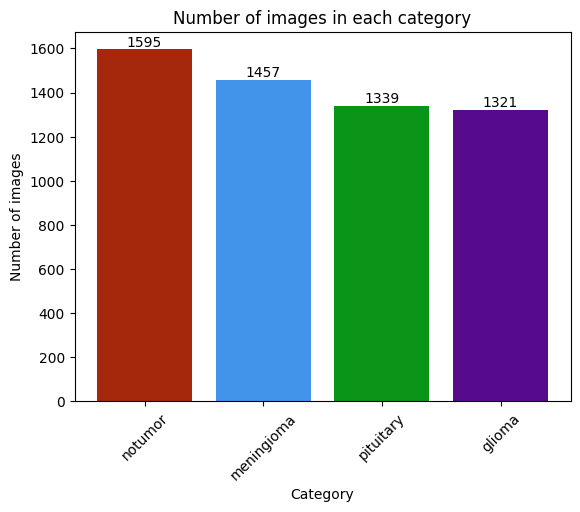

In [10]:
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

In [12]:
Test_df = '/content/brain-tumor-mri-dataset/Testing'

filepaths = []
labels = []
folds = os.listdir(Test_df)
for fold in folds:
    FoldPath = os.path.join(Test_df, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filepaths.append(filepath)
        labels.append(fold)

100%|██████████| 300/300 [00:00<00:00, 390046.87it/s]


In [13]:
print(len(filepaths))
print(len(labels))
print(np.unique(labels))

1311
1311
['glioma' 'meningioma' 'notumor' 'pituitary']


In [14]:
df_test = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)
df_test.head()

,filepath,label
0,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
1,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
2,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
3,/content/brain-tumor-mri-dataset/Testing/notum...,notumor
4,/content/brain-tumor-mri-dataset/Testing/notum...,notumor


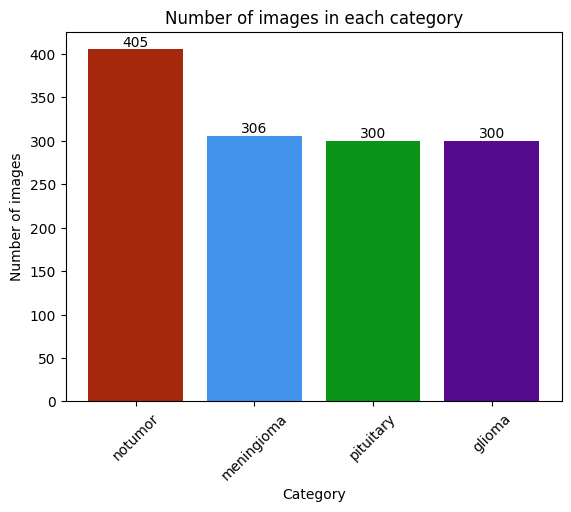

In [15]:
fig, ax = plt.subplots()
bars = ax.bar(df_test['label'].unique(), df_test['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

In [16]:
valid_ts, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [17]:
tr_gen = ImageDataGenerator(rescale=1/255)
ts_gen = ImageDataGenerator(rescale=1/255)
batchsize = 32
img_size = (224,224)

In [18]:
gen_train = tr_gen.flow_from_dataframe(df_train, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_valid = ts_gen.flow_from_dataframe(valid_ts, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_test = ts_gen.flow_from_dataframe(df_test, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=False ,color_mode='rgb')

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [19]:
class_dict = gen_train.class_indices


In [20]:
Model = Sequential([
    Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(img_size[0],img_size[1],3)),
    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(265, kernel_size= (3,3), activation='relu'),
    Conv2D(265, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0,3),
    Dense(4, activation='softmax') ])

In [21]:
Model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = Model.fit(
    gen_train,
    epochs=50,
    validation_data=gen_valid,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 128s 531ms/step - accuracy: 0.3695 - loss: 1.2491 - val_accuracy: 0.6870 - val_loss: 0.7692
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 62s 349ms/step - accuracy: 0.7265 - loss: 0.6843 - val_accuracy: 0.7176 - val_loss: 0.6962
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 352ms/step - accuracy: 0.7965 - loss: 0.5141 - val_accuracy: 0.7740 - val_loss: 0.4815
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 357ms/step - accuracy: 0.8689 - loss: 0.3660 - val_accuracy: 0.8443 - val_loss: 0.4181
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.8927 - loss: 0.2783 - val_accuracy: 0.8580 - val_loss: 0.3390
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.9167 - loss: 0.2251 - val_accuracy: 0.8870 - val_loss: 0.2619
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.9353 - loss: 0.1827 - val_accuracy: 0.8977 - val_loss: 0.2747
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.9516 - loss: 

In [23]:
print(Model.evaluate(gen_train))
print(Model.evaluate(gen_valid))
print(Model.evaluate(gen_test))


179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - accuracy: 0.9987 - loss: 0.0069
[0.007398971822112799, 0.9984243512153625]
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9786 - loss: 0.0944
[0.08428190648555756, 0.9740458130836487]
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9812 - loss: 0.0832
[0.11459983140230179, 0.9740853905677795]


In [24]:
train_score = Model.evaluate(gen_train, verbose=1)
valid_score = Model.evaluate(gen_valid, verbose=1)
test_score = Model.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9982 - loss: 0.0071
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9687 - loss: 0.1014
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9812 - loss: 0.0832
Train Loss: 0.0074
Train Accuracy: 99.84%
--------------------
Validation Loss: 0.0843
Validation Accuracy: 97.40%
--------------------
Test Loss: 0.1146
Test Accuracy: 97.41%


In [25]:
preds = Model.predict(gen_test)
y_pred = np.argmax(preds, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


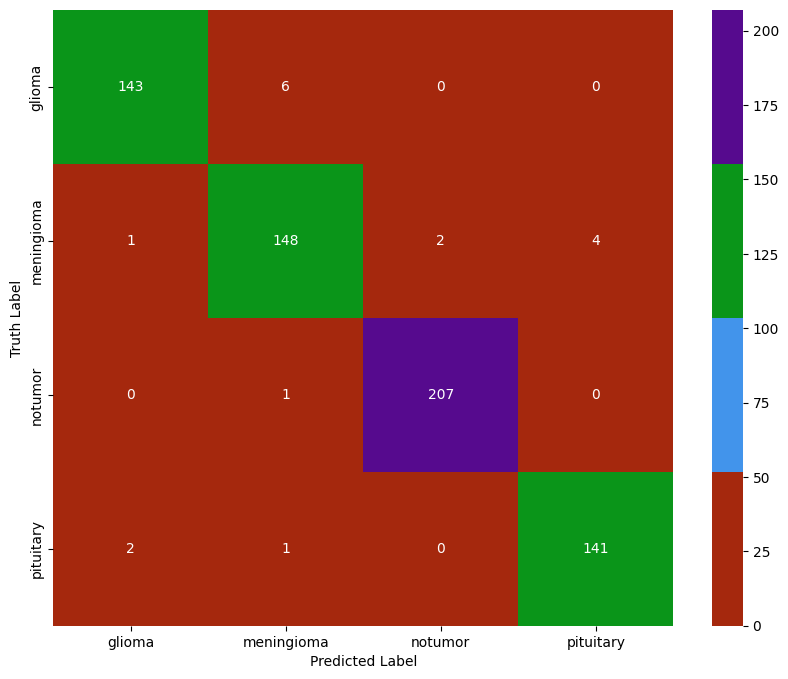

In [26]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

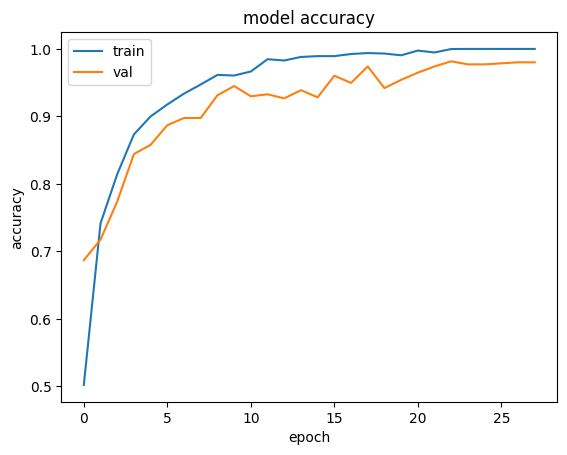

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

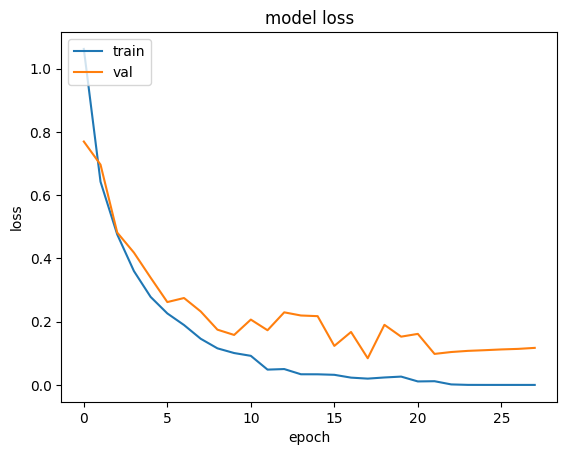

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [29]:
def predict(img_path):


    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = Model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


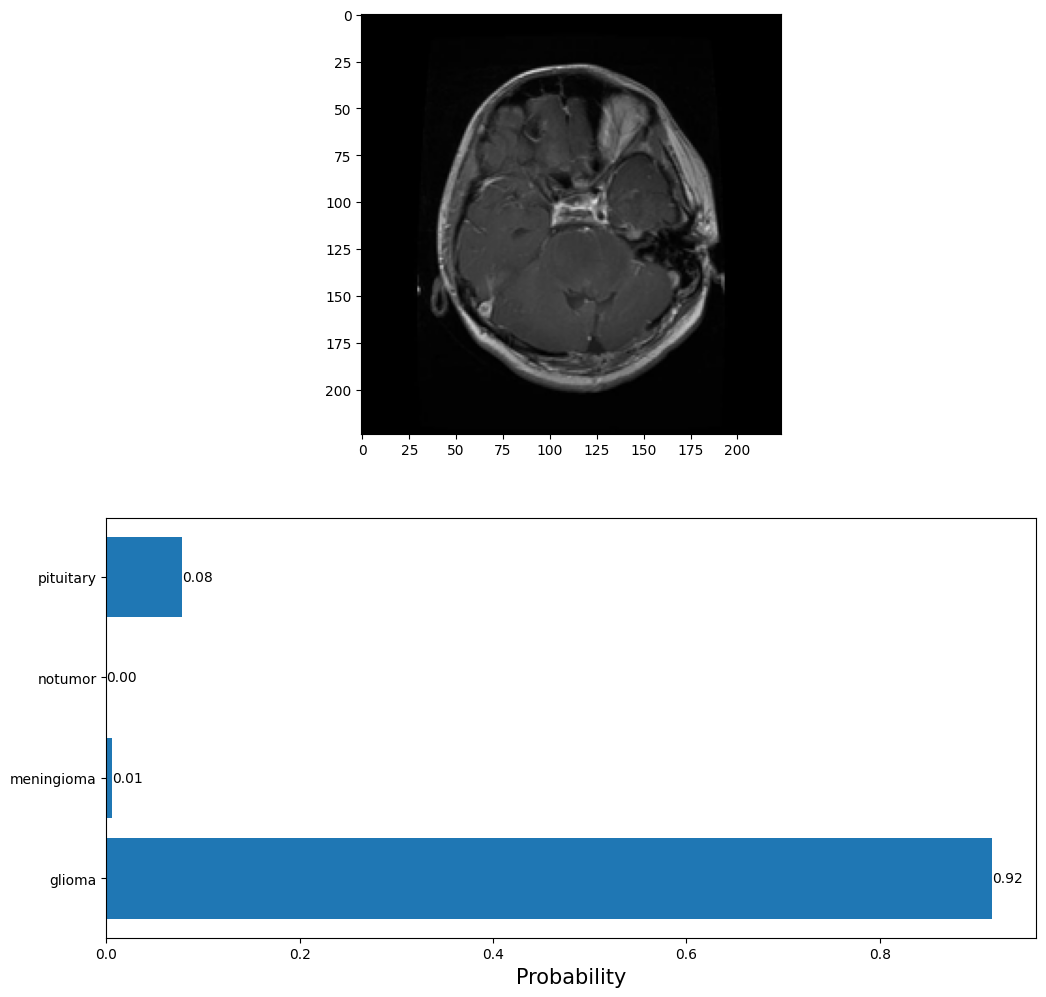

In [30]:
predict('/content/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg')

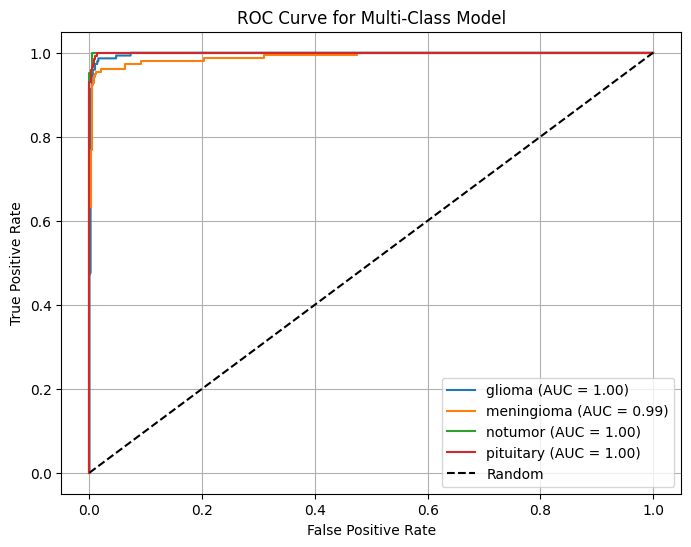

In [31]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarizing the test labels
y_true_bin = label_binarize(gen_test.classes, classes=[0, 1, 2, 3])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_dict)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Model')
plt.legend()
plt.grid()
plt.show()

In [32]:
Model.save('ModelCNN.h5')

In [ ]:
from keras.models import load_model

model = load_model('ModelCNN.h5')

In [34]:
test_loss, test_acc = model.evaluate(gen_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9812 - loss: 0.0832
Test Loss: 0.1146
Test Accuracy: 97.41%
